## 1. Manipulando diretórios

In [7]:
import os

In [8]:
os.getcwd()

'/content'

In [9]:
caminho = os.getcwd()

In [10]:
type(caminho)

str

In [11]:
novo_caminho = caminho + '\\Arquivos'

In [12]:
novo_caminho

'/content\\Arquivos'

In [5]:
import pandas as pd

In [17]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [20]:
weg = pd.read_csv('/content/drive/MyDrive/WEGE3.SA.csv')

In [21]:
weg.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,29.260000,30.190001,29.170000,29.730000,29.278723,9073300
1,2022-08-09,29.840000,30.139999,29.190001,29.580000,29.130997,6007000
2,2022-08-10,29.959999,30.930000,29.799999,30.680000,30.214302,8105700
3,2022-08-11,30.920000,30.990000,29.900000,30.129999,29.672647,6286900
4,2022-08-12,30.320000,30.959999,29.950001,30.900000,30.430960,8429300


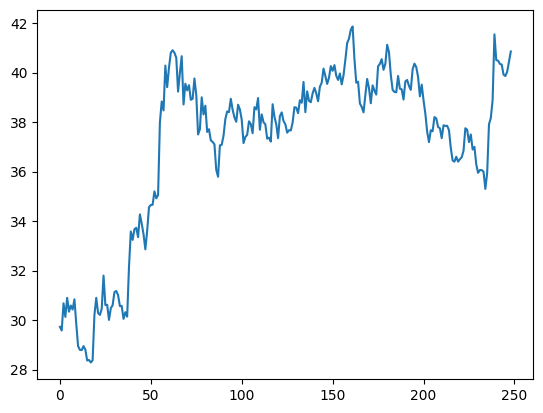

In [23]:
weg['Close'].plot();

## 2. Como trazer arquivos de outras pastas

In [28]:
petr4 = pd.read_csv('/content/drive/MyDrive/PETR4.SA.csv')

In [30]:
petr4.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,35.139999,36.770000,35.130001,36.630001,21.799688,109484600
1,2022-08-09,37.009998,37.459999,36.849998,37.230000,22.156767,79051200
2,2022-08-10,37.650002,37.650002,36.610001,37.110001,22.085350,78369600
3,2022-08-11,37.450001,37.860001,36.250000,36.250000,21.573538,128896500
4,2022-08-12,29.100000,31.830000,29.080000,31.709999,23.175585,171288300


## 3. Trazendo dados externos

In [31]:
import yfinance as yf

In [ ]:
lren = yf.download('LREN3.SA', start = '2017-01-01', end = '2021-07-01')

In [33]:
lren.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,16.774584,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,17.289284,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.137049,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,16.977566,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,16.781832,2139141


<Axes: xlabel='Date'>

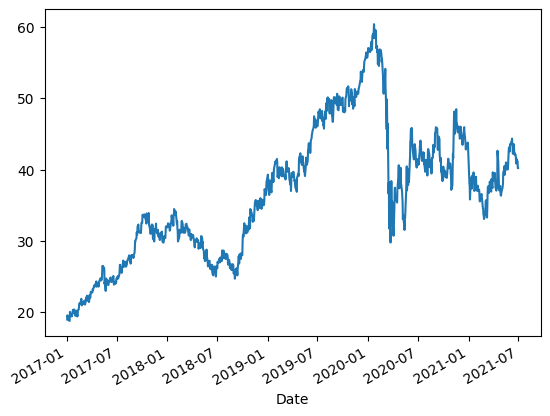

In [34]:
lren.Close.plot()

## 4. Realizando um join

In [35]:
from IPython.display import Image
Image(url = 'https://www.thecrazyprogrammer.com/wp-content/uploads/2019/05/Joins-in-SQL-Inner-Outer-Left-and-Right-Join.jpg')

In [36]:
lren.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,16.774584,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,17.289284,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.137049,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,16.977566,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,16.781832,2139141


In [37]:
weg.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,29.260000,30.190001,29.170000,29.730000,29.278723,9073300
1,2022-08-09,29.840000,30.139999,29.190001,29.580000,29.130997,6007000
2,2022-08-10,29.959999,30.930000,29.799999,30.680000,30.214302,8105700
3,2022-08-11,30.920000,30.990000,29.900000,30.129999,29.672647,6286900
4,2022-08-12,30.320000,30.959999,29.950001,30.900000,30.430960,8429300


In [38]:
lren.rename(columns = {'Adj Close': 'LREN3'}, inplace = True)

In [39]:
lren.head()

,Open,High,Low,Close,LREN3,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,16.774584,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,17.289284,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.137049,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,16.977566,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,16.781832,2139141


In [40]:
weg.rename(columns = {'Adj Close': 'WEGE3'}, inplace = True)

In [41]:
weg.head()

,Date,Open,High,Low,Close,WEGE3,Volume
0,2022-08-08,29.260000,30.190001,29.170000,29.730000,29.278723,9073300
1,2022-08-09,29.840000,30.139999,29.190001,29.580000,29.130997,6007000
2,2022-08-10,29.959999,30.930000,29.799999,30.680000,30.214302,8105700
3,2022-08-11,30.920000,30.990000,29.900000,30.129999,29.672647,6286900
4,2022-08-12,30.320000,30.959999,29.950001,30.900000,30.430960,8429300


In [42]:
novo_df = pd.merge(lren, weg, how = 'inner', on = 'Date')

ValueError: ignored

In [43]:
weg['Date'] = pd.to_datetime(weg['Date'], format = '%Y-%m-%d')

In [44]:
weg.head()

,Date,Open,High,Low,Close,WEGE3,Volume
0,2022-08-08,29.260000,30.190001,29.170000,29.730000,29.278723,9073300
1,2022-08-09,29.840000,30.139999,29.190001,29.580000,29.130997,6007000
2,2022-08-10,29.959999,30.930000,29.799999,30.680000,30.214302,8105700
3,2022-08-11,30.920000,30.990000,29.900000,30.129999,29.672647,6286900
4,2022-08-12,30.320000,30.959999,29.950001,30.900000,30.430960,8429300


In [45]:
weg.index = weg['Date']

In [46]:
weg.head()

,Date,Open,High,Low,Close,WEGE3,Volume
Date,,,,,,,
2022-08-08,2022-08-08,29.260000,30.190001,29.170000,29.730000,29.278723,9073300
2022-08-09,2022-08-09,29.840000,30.139999,29.190001,29.580000,29.130997,6007000
2022-08-10,2022-08-10,29.959999,30.930000,29.799999,30.680000,30.214302,8105700
2022-08-11,2022-08-11,30.920000,30.990000,29.900000,30.129999,29.672647,6286900
2022-08-12,2022-08-12,30.320000,30.959999,29.950001,30.900000,30.430960,8429300


In [47]:
weg.drop(['Date'], axis = 1, inplace = True)

In [48]:
weg.head()

,Open,High,Low,Close,WEGE3,Volume
Date,,,,,,
2022-08-08,29.260000,30.190001,29.170000,29.730000,29.278723,9073300
2022-08-09,29.840000,30.139999,29.190001,29.580000,29.130997,6007000
2022-08-10,29.959999,30.930000,29.799999,30.680000,30.214302,8105700
2022-08-11,30.920000,30.990000,29.900000,30.129999,29.672647,6286900
2022-08-12,30.320000,30.959999,29.950001,30.900000,30.430960,8429300


In [49]:
novo_df = pd.merge(lren, weg, how = 'inner', on = 'Date')

In [50]:
novo_df.head()

,Open_x,High_x,Low_x,Close_x,LREN3,Volume_x,Open_y,High_y,Low_y,Close_y,WEGE3,Volume_y
Date,,,,,,,,,,,,


In [51]:
cotacoes = novo_df[['LREN3', 'WEGE3']]

In [52]:
cotacoes.head()

,LREN3,WEGE3
Date,,


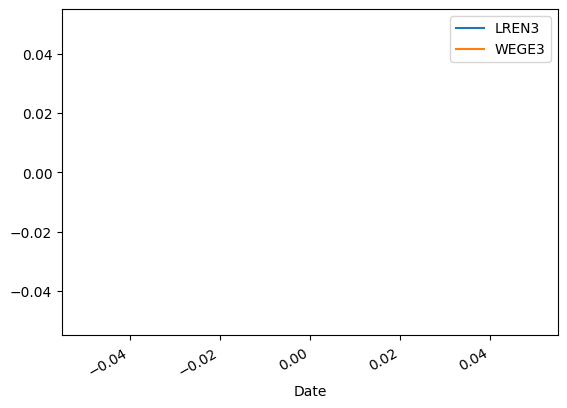

In [53]:
cotacoes.plot();

## 5. Análise de dados

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
relatorio = sv.analyze(cotacoes)

In [ ]:
relatorio.show_html('Relatorio_WEGE3_LREN3.html')

In [ ]:
cotacoes.WEGE3.hist()

In [ ]:
cotacoes.LREN3.hist()